# Tagged cross-section ratio of $(e,e'\pi^+)/(e,e'\pi^+)$ 

$$\left(\frac{\sigma(e,e'\pi^+)}{\sigma(e,e'\pi^+)}\right)_{p_n>275 GeV/c}$$

last edit July-19 2022

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

## (1) Load data

In [3]:
load_SIDIS_data( Nruns = 101,  do_e_e_pi=False, fdebug=1)

Done loading files.

Total statistics:
3933  (e,e'π+n) events
1279  (e,e'π-n) events


## (2) Apply selection cuts not previously imposed

In [4]:
_,e_e_pi_n_pass_cuts,_ = apply_further_selection_cuts_to_data(fdebug=2);

Applying selection cuts not previously imposed
(e,e'πn)
Apply a cut on the minimal neutron momentum p > 0.275 GeV/c
Apply a π+/π- acceptance matching cut on the in p-theta plane
Applying p-theta on cut for piplus on 2778 events
Subdividing into 1 subsets up to 500000 events
subset 0 of index 0-2777
Applying p-theta on cut for piminus on 861 events
Subdividing into 1 subsets up to 500000 events
subset 0 of index 0-860
(e,e π+ )
3933 events after original cut (100.0 %)
2777 events after p-theta cut (70.6 %)
2777 events after Kinematical cut (70.6 %)
(e,e π- )
1279 events after original cut (100.0 %)
861 events after p-theta cut (67.3 %)
861 events after Kinematical cut (67.3 %)
 
Done applying selection cuts not previously imposed


## (3) Extract cross-section ratio as a function of Bjorken $x$
For a moving proton $x'$, defined as
$ x' = Q^2/((W')^2 - m_N^2 + Q^2)$

In [5]:
z_bins   = np.array([0.35,0.45,0.65])
z_widths = np.array([0.05,0.05,0.15])
x_bins   = np.array([0.2, 0.32, 0.44, 0.56 ])
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
print('x bins:',x_bins)
print('z bins:',z_bins)
for z_bin,z_width in zip(z_bins,z_widths):
    z_min,z_max = z_bin-z_width, z_bin+z_width
    print('%.3f < z < %.3f:'%(z_min,z_max))

x bins: [0.2  0.32 0.44 0.56]
z bins: [0.35 0.45 0.65]
0.300 < z < 0.400:
0.400 < z < 0.500:
0.500 < z < 0.800:


In [6]:
var_label = "standing proton x"
# var_label = "moving proton x"
if   var_label == "standing proton x":
    var    = 'xB'
    xlabel = "Bjorken $x$"
    
elif var_label == "moving proton x":
    var    = 'xPrime2'
    xlabel = "$x' = Q^2/(W'^2 - m_N^2 + Q^2)$"    

# (4) Extract tabular data and save results to file# (4) Extract tabular data and save results to file

In [7]:
extract_SIDIS_ratio(df_dict  = e_e_pi_n_pass_cuts,
                           x_var    = var ,                           
                           x_bins   = x_bins,                           
                           z_bins   = z_bins,                           
                           z_widths = z_widths,                           
                           fdebug   = 0,
                           prefix   = 'Tagged_SIDIS_ratio_',                           
                           suffix   = '')

saved /Users/erezcohen/Desktop/data/BAND/Results/Tagged_SIDIS_ratio_Zmin0.300_Zmean_pips0.346_pims0.343_Zmax0.400.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Tagged_SIDIS_ratio_Zmin0.400_Zmean_pips0.445_pims0.444_Zmax0.500.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Tagged_SIDIS_ratio_Zmin0.500_Zmean_pips0.614_pims0.600_Zmax0.800.csv


## load results and plot them

Reading files from /Users/erezcohen/Desktop/data/BAND/Results/
reading Tagged_SIDIS_ratio_Zmin0.500_Zmean_pips0.614_pims0.600_Zmax0.800.csv
reading Tagged_SIDIS_ratio_Zmin0.400_Zmean_pips0.445_pims0.444_Zmax0.500.csv
reading Tagged_SIDIS_ratio_Zmin0.300_Zmean_pips0.346_pims0.343_Zmax0.400.csv
Done.


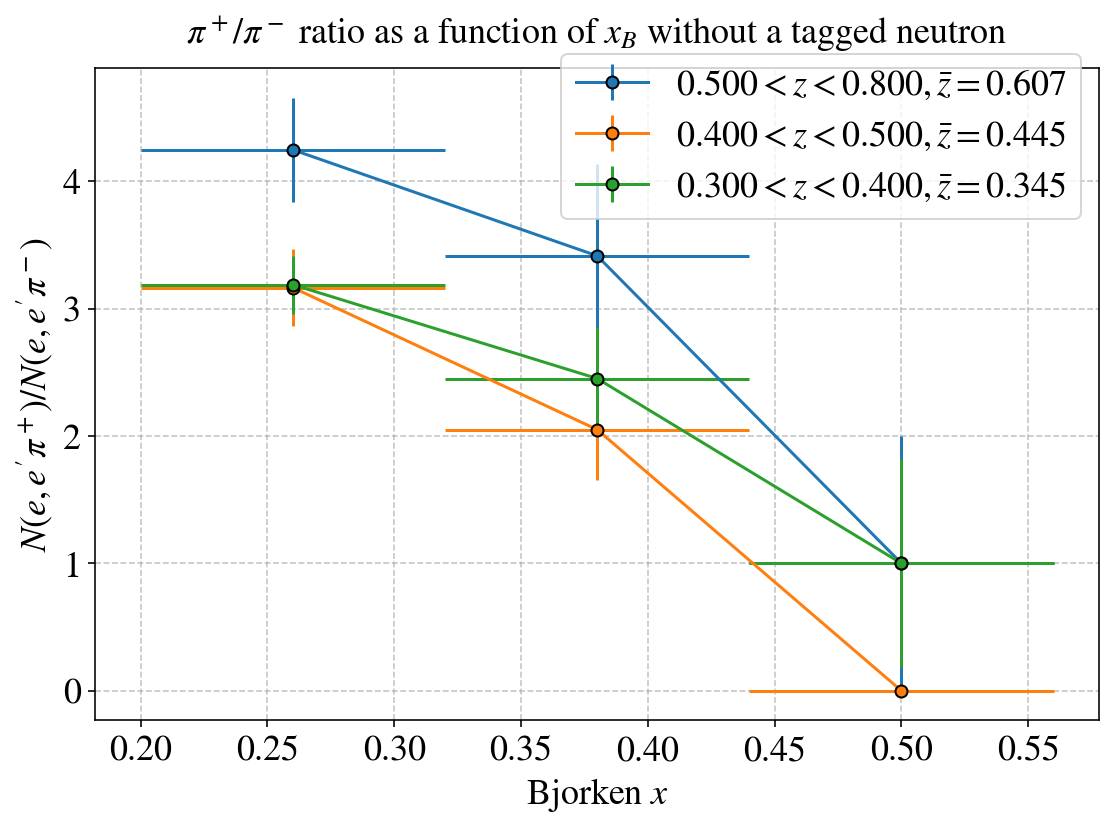

In [8]:
prefix = 'Tagged_SIDIS_ratio_'
suffix = ''
SIDIS_results = load_SIDIS_ratio(prefix = prefix, suffix = suffix, doPlotResults=True)

# (5) Extract modified results
With no acceptance matching cut in $p-\theta$ plane

In [9]:
_,e_e_pi_n_pass_cuts_no_p_theta_cut,_ = apply_further_selection_cuts_to_data(fdebug=2,
                                                                           NeventsMax=-1, 
                                                                           doAcceptanceMatchingCut=False);

Applying selection cuts not previously imposed
(e,e'πn)
Apply a cut on the minimal neutron momentum p > 0.275 GeV/c
(e,e π+ )
3933 events after original cut (100.0 %)
2778 events after p-theta cut (70.6 %)
2778 events after Kinematical cut (70.6 %)
(e,e π- )
1279 events after original cut (100.0 %)
861 events after p-theta cut (67.3 %)
861 events after Kinematical cut (67.3 %)
 
Done applying selection cuts not previously imposed


In [10]:
save_SIDIS_ratio_DataFrame(df_dict  = e_e_pi_n_pass_cuts_no_p_theta_cut,                                
                           x_var    = var ,                           
                           x_bins   = x_bins,                           
                           z_bins   = z_bins,                           
                           z_widths = z_widths,                           
                           fdebug   = 0,
                           prefix   = 'Tagged_SIDIS_ratio_',                           
                           suffix   = '_No_AcceptanceMatchingCut')

NameError: name 'save_SIDIS_ratio_DataFrame' is not defined

In [ ]:
prefix = 'Tagged_SIDIS_ratio_'
suffix = '_No_AcceptanceMatchingCut'
Tagged_SIDIS_results = load_SIDIS_ratio_DataFrame(z_bins=z_bins,z_widths=z_widths,
                                                  prefix = prefix, suffix = suffix, doPlotResults=True)

# arxiv

In [ ]:

# Rpips2pims_n, Rpips2pims_n_errup, Rpips2pims_n_errdw = dict(), dict(), dict()
# Y, dY = dict(),dict()
# for z_bin,z_width in zip(z_bins,z_widths):
#     z_min,z_max = z_bin-z_width,z_bin+z_width
#     (Rpips2pims_n[z_bin],
#      Rpips2pims_n_errup[z_bin], 
#      Rpips2pims_n_errdw[z_bin],_,_) = compute_ratio_pips_to_pims(df_dict=e_e_pi_n  , 
#                                                              var=var, 
#                                                              bins=x_bins, 
#                                                              z_min=z_min,z_max=z_max)

#     # fit to a constant 
#     y    = Rpips2pims_n[z_bin]
#     y_err= (Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
#     p,cov = np.polyfit(x,y,deg=0,cov=True)
#     Y[z_bin],dY[z_bin] = p[0],cov[0,0]

#     # print(z_bin,Rpips2pims_n[z_bin],Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
# print('done') 

In [ ]:
# fig = plt.figure(figsize=(9,6))
# ax  = fig.add_subplot(1,1,1)
# for z_bin,z_width in zip(z_bins,z_widths):
#     y    = Rpips2pims_n[z_bin]
#     y_err= (Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
#     x_fit = np.linspace(np.min(x),np.max(x),100)
#     y_dw = (Y[z_bin]-dY[z_bin])*np.ones(len(x_fit))
#     y_up = (Y[z_bin]+dY[z_bin])*np.ones(len(x_fit))

#     # plot
#     l=ax.errorbar(x=x, xerr=x_err,  y=y, yerr=y_err,
#                 marker='o',markeredgecolor='k',
#                 label='$z=%.2f\pm%.2f, (\pi^+/\pi^-)=%.1f\pm%.1f$'%(z_bin,z_width,Y[z_bin],dY[z_bin]))
    
#     ax.fill_between( x_fit, y_dw, y_up, color=l[0].get_color(), alpha=0.1)
# set_axes(ax,xlabel,"$N(e,e'\pi^+n)/N(e,e'\pi^-n)$",
#          title="$\pi^+/\pi^-$ ratio as a function of $x'$ with a tagged neutron",
#          do_add_grid=True, do_add_legend=True, fontsize=18,
#         );